<a href="https://colab.research.google.com/github/TyamanovaMargo/DI-Bootcamp/blob/main/Exercise_xp_week5_d2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import accuracy_score

#🌟 Exercise 1 : Understanding the problem and Data Collection

In [ ]:
'''
We want to predict if an individual will have diabetes.

    Load the diabetes dataset and explore it.
    How many positive and negative cases is there ?
    Split the data into training and testing sets
'''

'\nWe want to predict if an individual will have diabetes.\n\n    Load the diabetes dataset and explore it.\n    How many positive and negative cases is there ?\n    Split the data into training and testing sets\n'

In [3]:
!pip install kaggle


In [4]:
from google.colab import files
files.upload()  # Select kaggle.json when prompted


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"margaritatyamanova","key":"78ee90976aee5c9d3622234e6005f9df"}'}

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset


Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
100% 734k/734k [00:00<00:00, 1.64MB/s]
100% 734k/734k [00:00<00:00, 1.64MB/s]


In [7]:
!unzip /content/diabetes-prediction-dataset.zip -d /content/


Archive:  /content/diabetes-prediction-dataset.zip
  inflating: /content/diabetes_prediction_dataset.csv  


read the file

In [43]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

df.head()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


explore it

In [64]:
df.isnull().sum()


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [65]:
df.dtypes


,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


How many positive and negative cases is there ?

In [66]:
df.duplicated().sum()

0

In [67]:
df.drop_duplicates(inplace=True)

In [68]:
df["diabetes"].value_counts()

,count
diabetes,
0,87664
1,8482


Split the data into training and testing sets

In [69]:
from sklearn.model_selection import train_test_split
feature_names = df.iloc[:, 1:8].columns
target = df.iloc[:1, 8: ].columns
print(feature_names)
print(target)

Index(['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level'],
      dtype='object')
Index(['diabetes'], dtype='object')


In [70]:
data_features = df[feature_names]   #X
data_target = df[target]            #Y

In [71]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.80, test_size=0.20, random_state=42)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))


Length of X_train is: 76916
Length of X_test is: 19230
Length of y_train is: 76916
Length of y_test is: 19230


#🌟 Exercise 2 : Model Picking and Standardization

Which classification model can we use in this problem and why ?

In [ ]:
'''
Logistic Regression: Predicting yes/no outcomes, like if a fruit is ripe or not. (what we will use today !)

It predicts the probability of occurrence of an event by fitting data to a logistic curve. It is widely used for classification problems where the outcomes are discrete (e.g., yes/no, 0/1).
    '''

'\nLogistic Regression: Predicting yes/no outcomes, like if a fruit is ripe or not. (what we will use today !)\n\n    It predicts the probability of occurrence of an event by fitting data to a logistic curve. It is widely used for classification problems where the outcomes are discrete (e.g., yes/no, 0/1).\n    '

In [74]:
#In logistic regression we need to use StandardScaler because if not it would give more importance to columns which amounts were bigger
#We use Logistic regression because is a Yes diabetes or no diabetes

le = LabelEncoder()
#to convert the string values into numerical labels

# Iterate over each column in X_train
for column in X_train.select_dtypes(include=['object']).columns:
    # Fit the LabelEncoder to the column and transform it
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column]) # Use same encoding on test data


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

StandardScaler can only handle numerical data, so you need to encode categorical variables into numeric ones before scaling

#🌟 Exercise 3 : Model Training

In [80]:

model = LogisticRegression()

# we use .ravel() to transform the y_train data into a 1D array because LogisticRegression() expects the target variable (in this case, y_train) to be a 1D array rather than a column vector or a 2D array.
model.fit(X_train, y_train.values.ravel())

pred = model.predict(X_test)

#metrics eval
accuracy = round(accuracy_score(y_test, pred), 2)
f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)

print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))
print("Accuracy for Logistic Regression Model 1 : {accuracy}".format(accuracy = accuracy))

Sensitivity/Recall for Logistic Regression Model 1 : 0.63
F1 Score for Logistic Regression Model 1 : 0.72
Accuracy for Logistic Regression Model 1 : 0.96


#🌟 Exercise 4 : Evaluation Metrics

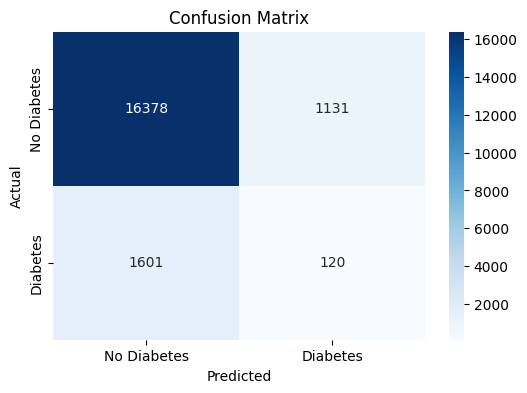

Classification Report:
               precision    recall  f1-score   support

 No Diabetes       0.91      0.94      0.92     17509
    Diabetes       0.10      0.07      0.08      1721

    accuracy                           0.86     19230
   macro avg       0.50      0.50      0.50     19230
weighted avg       0.84      0.86      0.85     19230



In [82]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"])
print("Classification Report:\n", class_report)


#🌟 Exercise 5 : Visualizing the performance of our model

Visualize the decision boundary with accuracy information

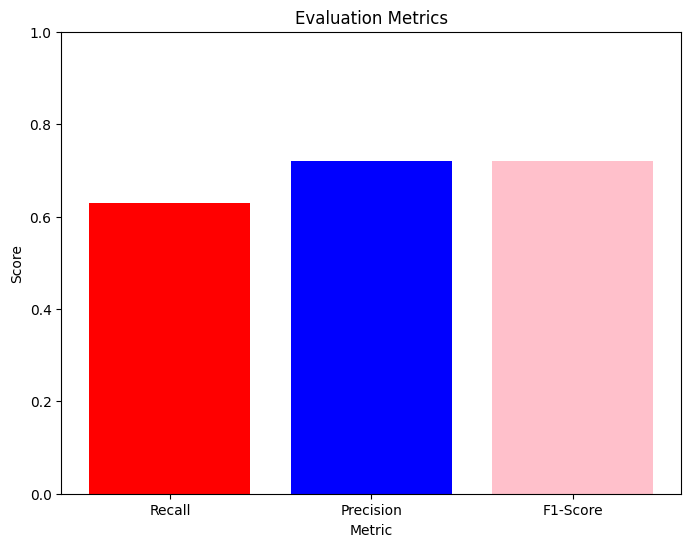

In [84]:
# Plotting Recall, Precision, and F1-Score
metrics = ['Recall', 'Precision', 'F1-Score']
values = [recall_score, f1_score, round(f1_score, 2)]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['red', 'blue', 'pink'])
plt.ylim(0, 1)
plt.title('Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()


 #🌟 Exercise 6 : ROC Curve

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

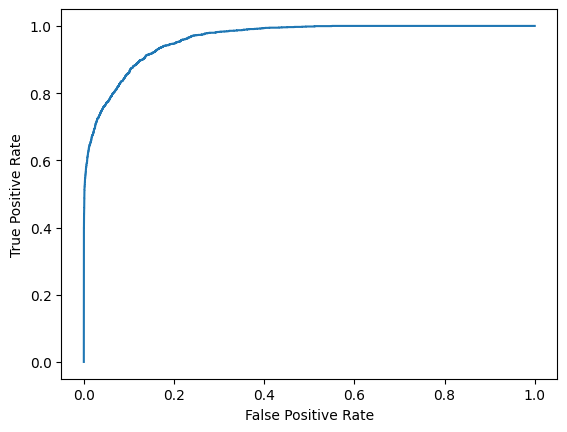

In [88]:


#define metrics
y_pred_proba =  model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()